# Predicting Insurance Costs

The Medical Cost Dataset from Kaggle contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of the person who received it.

We want to construct the best possible predictive model for the cost using a linear regression model, we're interested in how these different characteristics relate to the total medical cost. It's a continuous, positive number, which makes it a good candidate for a linear regression, given some information about the patient. 

Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

In [76]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [77]:
inn_df = pd.read_csv('insurance.csv')

inn_df.head() # Display the first few roles of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
inn_df.shape # Number of Observation & Features

(1338, 7)

In [79]:
inn_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [80]:
inn_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [81]:
inn_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [82]:
in_df = inn_df.copy()

In [83]:
in_df["smoker"] = in_df["smoker"].apply(lambda x: 1 if x == "yes" else 0)
in_df["sex"] = in_df["sex"].apply(lambda x: 1 if x == "male" else 0)

In [84]:
in_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


The numerical predictors below correlate high with the outcome charges column

In [85]:
corr = in_df.corr()

high = corr['charges'].sort_values(ascending=False)

predictor = high.index[:]

predictor

Index(['charges', 'smoker', 'age', 'bmi', 'children', 'sex'], dtype='object')

/tmp/ipykernel_77/99375091.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  in_df[predictor].hist(ax=ax)


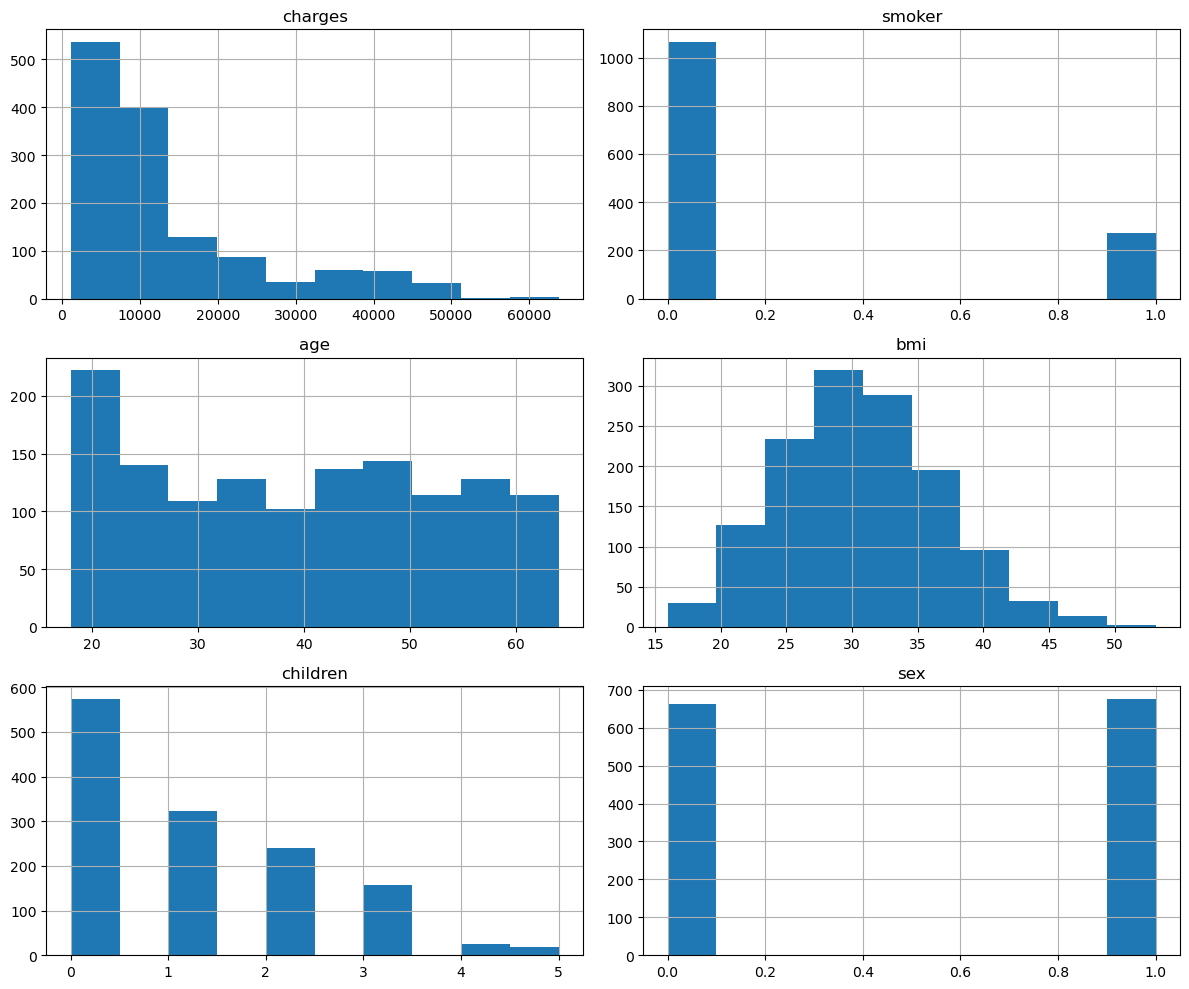

In [86]:
# Checking out their relationship with the help of an histogram

fig, ax = plt.subplots(figsize=(12, 10))
in_df[predictor].hist(ax=ax)
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'log_charges'}>]], dtype=object)

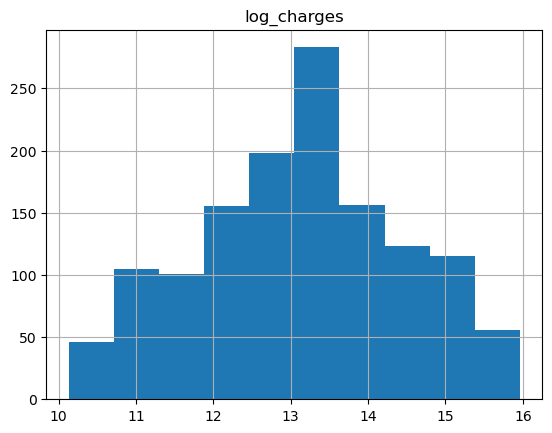

In [87]:
in_df["log_charges"] = np.log2(in_df["charges"])

in_df.hist("log_charges")

The log-transformed charges values are more centered, which is what we wanted. This makes it more likely that the errors will be unbiased.

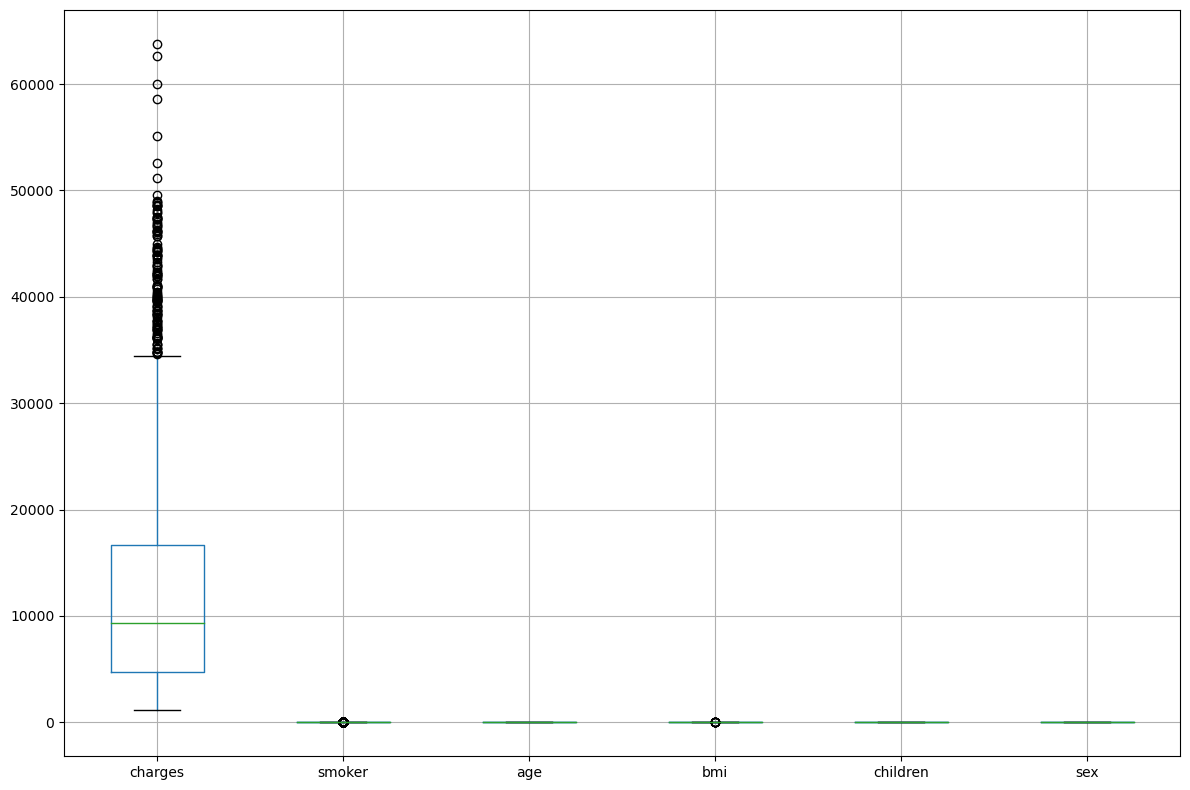

In [97]:
# Checking out their relationship with the help of an histogram

fig, ax = plt.subplots(figsize=(12, 8))
in_df[predictor].boxplot(ax=ax)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'log_charges'}, xlabel='sex'>

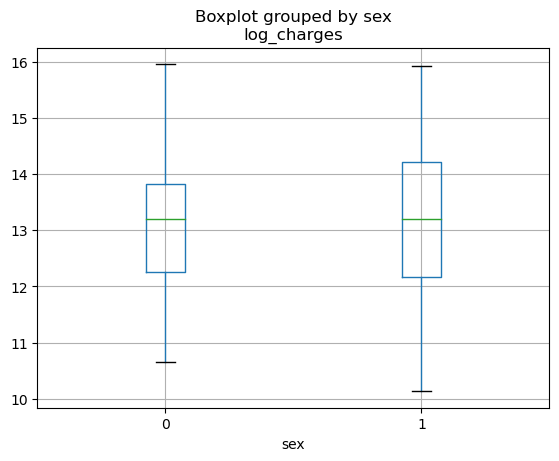

In [98]:
in_df.boxplot(column = ["log_charges"], by = "sex")

The charges column is highly skewed to the right. Extremely costly insurance charges are more common than extremely small ones. This makes it unlikely that the errors in the model will truly be centered at zero. It might be worth it to log-transform the outcome.

<AxesSubplot:title={'center':'log_charges'}, xlabel='smoker'>

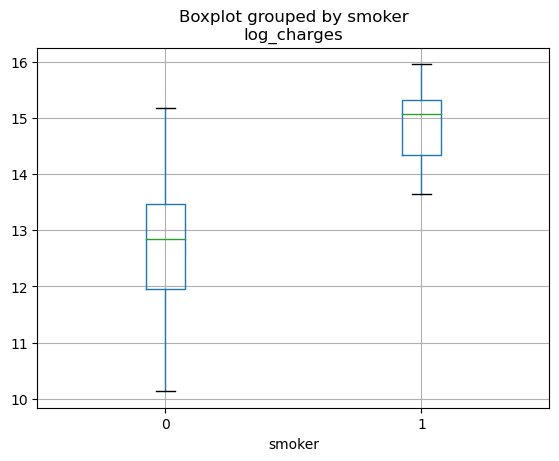

In [100]:
in_df.boxplot(column = ["log_charges"], by = "smoker")

Males seem to have a wider distribution of charges compared to women. Smokers have much higher costs than non-smokers. There doesn't seem tobe many appreciable differences between regions.

In [88]:
# Spliting the dataset into 80% training and 20% testing
predictors = ["age", "bmi", "smoker"]
X = in_df[predictors]
y = in_df['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [89]:
# Constructing a Linear regression model with the training set

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
X_pred = model.predict(X_subset)
train_error = mean_squared_error(y_train, X_pred)
coefficients = model.coef_
R2 = r2_score(y_train, X_pred)
intercepts = model.intercept_
print('Coefficients: ', coefficients)
print('Intercepts: ', intercepts)
print('Mean Squared Error(MSE): ', train_error)
print('MSE on the original scale for the insurance charges: ', np.exp(mean_squared_error(y_train, X_pred)))
print('Coefficient of Distribution R2: ', R2)

Coefficients:  [0.05125118 0.01688051 2.26926275]
Intercepts:  10.128142900771822
Mean Squared Error(MSE):  0.44917110356833523
MSE on the original scale for the insurance charges:  1.5670127557366225
Coefficient of Distribution R2:  0.7519618696072672


The training MSE for the model is 0.45 and is 1.57 on the original scale. The 
 indicates that the model can explain 74% of the variation in the log-insurance charges. These preliminary results are promising, but we must remember that these are optimistic values.
 
From The Intercept And Coefficient:

- A year increase in the subject is associated with a 0.04 increase in the log charges, holding smoking status and bmi constant. About a 4% increase in the charges on the regular scale.
- A unit increase in the subject BMI is associated with a 0.01 increase in the log charges, holding smoking status and age constant. About a 1.5% increase in the charges on the regular scale.
- A smoker is associated with a 2.23 increase in the log charges, holding age and bmi constant. About a 930% increase in the charges on the regular scale.

Note: we are not concerned about if these changes are statistically significant, so we don't know if these associations are truly non-zero. Our primary goal is prediction.

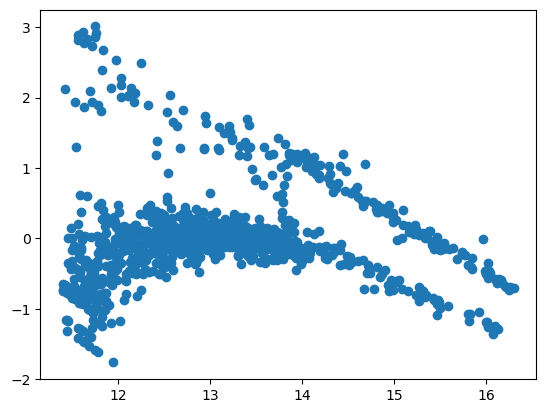

In [93]:
residuals = y_train - X_pred

plt.scatter(X_pred, residuals)
plt.show()

The residuals suggest some violations to the assumptions of linear regression. As fitted values get larger, the residuals trend downward. We expect an even band, centered around zero. This does not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions.

### Final Model Evaluation

In [94]:
y_pred = model.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
coefficients = model.coef_
R2 = r2_score(y_test, y_pred)
intercepts = model.intercept_
print('Coefficients: ', coefficients)
print('Intercepts: ', intercepts)
print('Mean Squared Error(MSE): ', train_error)
print('MSE on the original scale for the insurance charges: ', np.exp(mean_squared_error(y_test, y_pred)))
print('Coefficient of Distribution R2: ', R2)

Coefficients:  [0.05125118 0.01688051 2.26926275]
Intercepts:  10.128142900771822
Mean Squared Error(MSE):  0.44917110356833523
MSE on the original scale for the insurance charges:  1.5702003480656106
Coefficient of Distribution R2:  0.7086242757213883


The test MSE was about 0.435, while the training MSE was about 0.454. In this case, the two errors match up pretty well, so we can conclude that the model is not overfit. The residuals suggest that the model is predicting much lower costs for subjects who were actually charged much higher. Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative.

We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms.